In [21]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
pyber_data_complete = pd.merge(ride_data, city_data, how="left", on=["city", "city"])


# Display the data table for preview
pyber_data_complete.head() 

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

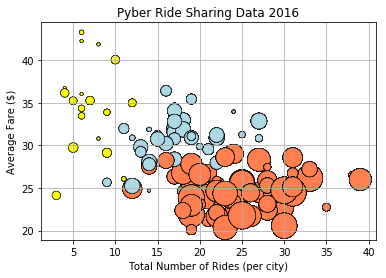

<Figure size 432x288 with 0 Axes>

In [50]:
# Obtain the x and y coordinates for each of the three city types
f1 = pyber_data_complete.groupby("city")["fare"].mean().reset_index(name="avg fare")
f1.head()
f2 = pyber_data_complete.groupby("city")["ride_id"].count().reset_index(name="no rides")
f2.head()
f3 = pd.merge(f1, f2)
f3.head()
f4 = pyber_data_complete[["city", "type", "driver_count"]]
f5 = pd.merge(f3, f4)
f5.head()
#f5["color"] = ["light coral" if x =="Urban" else 800 for x in df['Event']] 
f5.loc[f5.type == "Urban", "color"] = "coral"  
f5.loc[f5.type == "Rural", "color"] = "yellow"
f5.loc[f5.type == "Suburban", "color"] = "lightblue"  
# Build the scatter plots for each city types
# create data
x = f5["no rides"].values
y = f5["avg fare"].values
z = f5["driver_count"].values
colors = f5["color"].values
labels= f5["type"].values
ride_length = len(x)

fig, ax = plt.subplots()
# use the scatter function
#plt.scatter(x, y, s=z*10,c=colors,linewidth=.5, edgecolors="black", label="test")
scatter = ax.scatter(x, y, c=colors, s=z*10,linewidth=.5, edgecolors="black")


# Incorporate the other graph properties
plt.xlabel("Total Number of Rides (per city)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data 2016")

plt.grid(True)

for handle in lgd.legendHandles:
    handle.set_sizes([100.0])


# Create a legend
#legend1 = ax.legend(*scatter.legend_elements(num=5),
#                    loc="upper left", title="Ranking")
#ax.add_artist(legend1)

# Incorporate a text label regarding circle size
plt.show()
# Save Figure
from io import BytesIO
f = BytesIO()
plt.savefig(f, format="svg")

## Total Fares by City Type

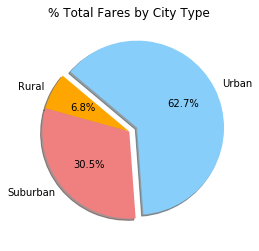

<Figure size 432x288 with 0 Axes>

In [46]:
# Calculate Type Percents
ff1 = pyber_data_complete.groupby("type")["fare"].sum().reset_index(name="tf")
ff1.head()

tot_fares = pyber_data_complete["fare"].sum()
tot_fares

ff1['pct fare'] = round((ff1['tf']/tot_fares) * 100, 2)
ff1.head()

# Build Pie Chart
sizes = ff1["pct fare"].values
explode = (0, 0, .1)
labels = ff1["type"].values
colors = ["orange", "lightcoral", "lightskyblue"]
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% Total Fares by City Type")

plt.show()
# Save Figure
from io import BytesIO
f = BytesIO()
plt.savefig(f, format="svg")

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

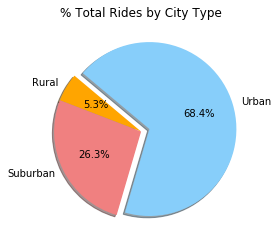

<Figure size 432x288 with 0 Axes>

In [48]:
# Calculate Ride Percents
ff1 = pyber_data_complete.groupby("type")["ride_id"].count().reset_index(name="no rides")
ff1.head()

tot_rides = pyber_data_complete["ride_id"].count()
tot_rides

ff1['pct rides'] = round((ff1['no rides']/tot_rides) * 100, 2)
ff1.head()

# Build Pie Chart
sizes = ff1["pct rides"].values
explode = (0, 0, .1)
labels = ff1["type"].values
colors = ["orange", "lightcoral", "lightskyblue"]
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% Total Rides by City Type")
plt.show()

# Save Figure
from io import BytesIO
f = BytesIO()
plt.savefig(f, format="svg")

In [6]:
# Show Figure
plt.show()

## Total Drivers by City Type

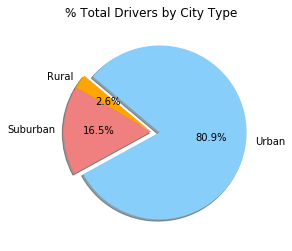

<Figure size 432x288 with 0 Axes>

In [49]:
# Calculate Driver Percents
ff1 = city_data.groupby("type")["driver_count"].sum().reset_index(name="no drivers")
ff1.head()

tot_drivers = city_data["driver_count"].sum()
tot_drivers

ff1['pct drivers'] = round((ff1['no drivers']/tot_drivers) * 100, 2)
ff1.head()

# Build Pie Charts
sizes = ff1["pct drivers"].values
explode = (0, 0,.1)
labels = ff1["type"].values
colors = ["orange", "lightcoral", "lightskyblue"]
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% Total Drivers by City Type")
plt.show()

# Save Figure
from io import BytesIO
f = BytesIO()
plt.savefig(f, format="svg")



In [8]:
# Show Figure
plt.show()